# Post-process of the constrained runs

In [1]:
import sys
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib as mpl

In [2]:
# mce is available in https://github.com/tsutsui1872/mce 
sys.path.append('../mce')

In [3]:
from src.tlm import ebm_to_irm
from src.util import RetrieveGitHub
from src.plot import MyPlot # depends on mce module

In [4]:
owner = 'IPCC-WG1'
repo = 'Chapter-4_Figure4.11'
repo_ch4 = RetrieveGitHub(owner, repo, './datain')

In [5]:
plt = MyPlot()

## Results from the constrained runs

In [6]:
# Output of 080_constrained_runs.ipynb
ncf_hist = Dataset('./dataout/constrained_run_hist.nc')
ncf_ssps = Dataset('./dataout/constrained_run_ssps.nc')

In [7]:
# Historical run period
year_hist = pd.Index(ncf_hist.variables['Year'][:])
year_hist

Int64Index([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
            ...
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', length=165)

In [8]:
# SSP scenarios run period
year_ssps = pd.Index(ncf_ssps.variables['Year'][:])
year_ssps

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
            2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
            2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
            2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
            2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
            2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
            2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64')

In [9]:
# Data structure of the scenario run results
nsize = ncf_ssps.dimensions['Member'].size
method_order = ncf_ssps.variables['Method'][:].tolist()
scenario_order = ncf_ssps.variables['Scenario'][:].tolist()
nsize, method_order, scenario_order

(600,
 ['ar6', 'ar6_orig', 'mce-2l', 's21'],
 ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585'])

In [10]:
# Make sure that the structure is the same as that of the historical run results
(
    method_order == ncf_hist.variables['Method'][:].tolist(),
    nsize == ncf_hist.dimensions['Member'].size,
)

(True, True)

In [11]:
# GSAT changes in the reference period of 1995-2014
slc_base = slice(
    year_hist.get_loc(1995),
    year_hist.get_loc(2014)+1,
)
gsat_base = ncf_hist.variables['tg'][:, :, slc_base].mean(axis=2)

# GSAT changes relative to 1995-2014
mi = pd.MultiIndex.from_product([
    method_order, scenario_order, year_ssps,
])
df_gsat = pd.DataFrame(
    (ncf_ssps.variables['tg'][:] - gsat_base.reshape(gsat_base.shape + (1, 1)))
    .reshape((nsize, -1)),
    columns=mi,
)
df_gsat

ar6                                                              \
       ssp119                                                               
         2015      2016      2017      2018      2019      2020      2021   
0    0.367136  0.399835  0.428092  0.454228  0.479565  0.505468  0.533369   
1    0.252314  0.273924  0.292582  0.310452  0.328425  0.347124  0.367447   
2    0.230467  0.252194  0.270761  0.288153  0.305785  0.324734  0.345387   
3    0.215314  0.232317  0.246005  0.259010  0.272254  0.286426  0.302820   
4    0.230602  0.248911  0.263263  0.277156  0.292199  0.309483  0.329937   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.228255  0.247987  0.264742  0.280871  0.297305  0.314882  0.334015   
596  0.241893  0.260187  0.274551  0.287830  0.300746  0.314108  0.329494   
597  0.232190  0.250575  0.264323  0.277136  0.290639  0.306097  0.325355   
598  0.249107  0.274810  0.296608  0.317214  0.338458  0.361929  0.388409   
599  0.244975  0.262175  0.272043  0.282769  0.297491  0.318194  0.346771   

                                   ...       s21                      \
                                   ...    ssp585                       
         2022      2023      2024  ...      2091      2092      2093   
0    0.563784  0.595152  0.625292  ...  3.018177  3.060856  3.102538   
1    0.389570  0.411850  0.432313  ...  2.135711  2.168713  2.200663   
2    0.367216  0.388283  0.406826  ...  3.100471  3.144453  3.187483   
3    0.321865  0.341733  0.360204  ...  3.450304  3.501389  3.551436   
4    0.353423  0.377899  0.400995  ...  3.804455  3.862844  3.920541   
..        ...       ...       ...  ...       ...       ...       ...   
595  0.354232  0.373505  0.389932  ...  3.522264  3.569207  3.615374   
596  0.347355  0.365437  0.381113  ...  3.184877  3.230122  3.274396   
597  0.348888  0.374009  0.397602  ...  3.907738  3.970895  4.033016   
598  0.417508  0.447281  0.475620  ...  3.899548  3.958334  4.016196   
599  0.382609  0.420937  0.456778  ...  3.064888  3.114731  3.163033   

                                                                           
                                                                           
         2094      2095      2096      2097      2098      2099      2100  
0    3.141292  3.177447  3.211566  3.244517  3.277067  3.309955  3.344226  
1    2.229314  2.255147  2.278881  2.301577  2.324124  2.347378  2.372532  
2    3.227744  3.265555  3.301454  3.336266  3.370714  3.405497  3.441598  
3    3.598423  3.642690  3.684817  3.725709  3.766160  3.806943  3.849147  
4    3.975480  4.027843  4.078108  4.127103  4.175612  4.224421  4.274666  
..        ...       ...       ...       ...       ...       ...       ...  
595  3.659875  3.702876  3.744652  3.785620  3.826150  3.866598  3.907463  
596  3.315929  3.355013  3.392158  3.428158  3.463716  3.499516  3.536523  
597  4.091231  4.145967  4.198010  4.248603  4.298853  4.349841  4.403105  
598  4.070602  4.121855  4.170604  4.217910  4.264750  4.312085  4.361296  
599  3.206633  3.246366  3.283340  3.319115  3.354941  3.392005  3.431962  

[600 rows x 1720 columns]

In [13]:
# ERF in 1995-2014
df_erf_1995to2014 = pd.concat({
    name:
    pd.DataFrame(
        ncf_hist.variables[name][:, :, slc_base].mean(axis=2),
        columns=method_order,
    )
    for name in ['erf', 'erf_co2']
}, axis=1)

In [14]:
# ERF in 2081-2100
slc = slice(
    year_ssps.get_loc(2081),
    year_ssps.get_loc(2100) + 1,
)
mi = pd.MultiIndex.from_product([method_order, scenario_order])
df_erf_2081to2100 = pd.concat({
    name:
    pd.DataFrame(
        ncf_ssps.variables[name][:, :, :, slc].mean(axis=3).reshape((nsize, -1)),
        columns=mi,
    )
    for name in ['erf', 'erf_co2']
}, axis=1)

In [15]:
# Add non-CO2 component
dfx = [
    pd.concat([
        df,
        pd.concat({'erf_non-co2': df['erf'] - df['erf_co2']}, axis=1),
    ], axis=1)
    for df in [df_erf_1995to2014, df_erf_2081to2100]
]

In [16]:
df_erf_1995to2014 = dfx[0]
df_erf_2081to2100 = dfx[1]

In [17]:
df_erf_1995to2014

erf                                 erf_co2                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    1.850095  2.470618  2.109683  2.122530  1.228337  1.626123  1.439894   
1    2.724318  2.369416  1.654284  2.528154  1.717313  1.585937  1.156801   
2    2.875965  2.097248  1.990072  2.275288  1.911944  1.554209  1.411293   
3    2.232341  2.145872  1.636587  2.742023  1.323245  1.494088  1.322076   
4    2.533857  2.271597  1.886724  1.982950  1.767934  1.359303  1.494161   
..        ...       ...       ...       ...       ...       ...       ...   
595  2.760818  2.287521  2.137308  2.230780  1.862856  1.472576  1.402088   
596  2.634422  2.217480  1.511179  2.904860  1.575772  1.680976  0.963371   
597  2.287328  2.388280  2.831393  2.184702  1.537556  1.708245  1.929008   
598  2.533077  2.408709  1.962022  1.969181  2.151089  1.669149  1.500485   
599  2.206922  2.190642  1.813150  2.349806  1.628586  1.323773  1.039814   

              erf_non-co2                                
          s21         ar6  ar6_orig    mce-2l       s21  
0    1.447029    0.621759  0.844494  0.669790  0.675501  
1    1.358360    1.007005  0.783480  0.497483  1.169795  
2    1.527140    0.964021  0.543039  0.578779  0.748148  
3    1.818792    0.909096  0.651785  0.314511  0.923231  
4    1.374929    0.765924  0.912295  0.392564  0.608022  
..        ...         ...       ...       ...       ...  
595  1.571744    0.897962  0.814944  0.735219  0.659036  
596  1.852359    1.058650  0.536504  0.547808  1.052501  
597  1.795302    0.749772  0.680035  0.902385  0.389401  
598  1.382529    0.381987  0.739560  0.461537  0.586651  
599  1.512206    0.578337  0.866869  0.773335  0.837600  

[600 rows x 12 columns]

In [18]:
df_erf_2081to2100

erf                                                               \
          ar6                                           ar6_orig             
       ssp119    ssp126    ssp245    ssp370     ssp585    ssp119    ssp126   
0    1.879150  2.488463  4.259208  6.216424   7.466410  2.429909  3.228474   
1    2.663185  3.475398  5.856766  8.509301  10.164596  2.461713  3.229583   
2    2.977368  3.893081  6.466424  9.394137  11.262909  2.444766  3.191215   
3    2.096292  2.739568  4.695417  6.798356   8.090057  2.341108  3.058421   
4    2.782341  3.595531  6.033705  8.355730  10.377146  2.053126  2.718668   
..        ...       ...       ...       ...        ...       ...       ...   
595  2.740820  3.642254  6.162655  9.130950  10.802535  2.411559  3.133353   
596  2.370984  3.144004  5.377073  8.027313   9.389809  2.573242  3.382130   
597  2.458207  3.191012  5.321534  7.429698   9.176161  2.562127  3.395014   
598  3.324893  4.336197  7.083550  9.823900  12.221413  2.596853  3.421767   
599  2.557121  3.330734  5.678814  7.736814   9.734283  2.225064  2.853522   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    5.474129  8.256036  9.713990  ...    0.515356  0.570855  1.161972   
1    5.410277  7.821477  9.457637  ...    0.479030  0.553516  1.095289   
2    5.337904  7.529311  9.299602  ...    0.390067  0.467371  1.125296   
3    5.044352  7.135674  8.826342  ...    0.301952  0.382326  0.993475   
4    4.642333  6.986240  8.179722  ...    0.559193  0.615431  1.132195   
..        ...       ...       ...  ...         ...       ...       ...   
595  5.284702  7.521703  9.070439  ...    0.378432  0.434923  1.023262   
596  5.683441  7.821780  9.854711  ...    0.313946  0.391265  0.975273   
597  5.678029  8.081591  9.917204  ...    0.477574  0.546678  1.277886   
598  5.667607  8.117397  9.809788  ...    0.422216  0.511273  1.218427   
599  4.776153  6.801794  8.293340  ...    0.365232  0.434985  1.077645   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    1.488202  1.829816  0.287444  0.347457  0.861958  1.518335  1.480620  
1    1.720096  1.882609  0.494022  0.535420  1.116961  1.959965  1.798768  
2    1.414353  1.732540  0.415413  0.487431  1.098720  1.818155  1.787356  
3    1.219186  1.648198  0.463835  0.541523  1.225480  1.819021  1.961591  
4    1.303757  1.796866  0.470102  0.542962  0.965271  1.494993  1.642749  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.671977  1.760838  0.541744  0.606549  1.198953  1.861196  1.987281  
596  1.568829  1.581898  0.344545  0.443115  1.206693  2.107309  1.929680  
597  2.013960  2.089697  0.312443  0.393929  0.978890  1.290960  1.607656  
598  1.669576  1.921268  0.487149  0.537583  1.053127  1.554183  1.743037  
599  1.649441  1.798238  0.421146  0.481490  1.053735  1.684615  1.727970  

[600 rows x 60 columns]

In [19]:
ncf_hist.close()
ncf_ssps.close()

## Results from constraining

In [20]:
# Output of 060_constraining.ipynb
# Constrained with the MH sampler, except for the AR6 original case
df_members = pd.read_csv(
    './dataout/constraining_results.csv',
    header=[0, 1], index_col=0,
)
mi = [({'ar6_orig': 'ar6_chapter7'}.get(k, 'mh_sampler'), k) for k in method_order]
df_members = df_members[mi].droplevel(0, axis=1)
df_members

Sampling,ar6,ar6_orig,mce-2l,s21
Sequence,,,,
0,7796,7,9649,22342
1,10266,11,34909,24905
2,12618,15,17814,38955
3,25845,16,45096,6674
4,17894,24,30940,48938
...,...,...,...,...
595,46701,3460,8243,36618
596,44151,3477,46505,4038
597,30470,3481,41679,47393


## Results from sampling

In [21]:
ncf = Dataset('./dataout/parms_sample.nc')

In [22]:
df = pd.concat({
    name:
    pd.DataFrame(
        ncf.variables[name][:],
        columns=ncf.variables['Method'][:].tolist(),
    )
    for name in ['lamg', 'a0', 'a1', 'tau0', 'tau1']
}, axis=1)
df

lamg                                      a0                      \
            ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0      0.455387  1.156137  0.732814  0.618850  0.316776  0.633887  0.907372   
1      0.514086  2.167808  0.567781  0.602851  0.694449  0.804552  0.385418   
2      1.826859  1.293838  0.579793  1.119089  0.685418  0.655928  0.422355   
3      0.820242  1.305245  0.774810  0.854260  0.616792  0.484126  0.576459   
4      0.524095  0.987906  1.072083  1.001792  0.342640  0.521316  0.575465   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.976287  2.002329  1.128069  0.949408  0.640604  0.905804  0.597140   
49996  0.653714  1.726767  0.425999  0.727459  0.467031  0.518705  0.316564   
49997  1.400915  2.028155  1.600347  1.047685  0.590074  0.630453  0.645734   
49998  0.920940  2.134309  1.152115  1.725560  0.491740  0.720603  0.531981   
49999  0.834505  1.590443  1.184067  0.749711  0.487574  0.700204  0.641828   

                       a1                                     tau0            \
            s21       ar6  ar6_orig    mce-2l       s21        ar6  ar6_orig   
0      0.221297  0.683224  0.366113  0.092628  0.778703   5.532152  5.288340   
1      0.661416  0.305551  0.195448  0.614582  0.338584  12.206376  3.264667   
2      0.671613  0.314582  0.344072  0.577645  0.328387   3.426498  4.086539   
3      0.233109  0.383208  0.515874  0.423541  0.766891   5.482689  3.045443   
4      0.642013  0.657360  0.478684  0.424535  0.357987   4.242295  4.727497   
...         ...       ...       ...       ...       ...        ...       ...   
49995  0.691326  0.359396  0.094196  0.402860  0.308674   5.402761  3.945026   
49996  0.436210  0.532969  0.481295  0.683436  0.563790   5.411241  1.702300   
49997  0.486960  0.409926  0.369547  0.354266  0.513040   3.662702  2.526115   
49998  0.631981  0.508260  0.279397  0.468019  0.368019   4.327060  3.200830   
49999  0.477271  0.512426  0.299796  0.358172  0.522729   4.437052  4.333171   

                                  tau1                                      
          mce-2l       s21         ar6    ar6_orig      mce-2l         s21  
0      12.860204  4.040706  652.818376  191.315007    2.291848   34.626445  
1       4.642432  8.305526  338.464450  141.131491  270.791680  296.476063  
2       5.356273  5.845531  369.718159  331.370328  104.022312  364.802490  
3       5.457200  3.213588  384.797069   64.251340  178.776645   30.501992  
4       3.165138  5.349923  771.120032   87.231027   93.353412  278.808211  
...          ...       ...         ...         ...         ...         ...  
49995   4.353383  6.478467  241.618416  336.553860  165.436043  401.506122  
49996   4.546670  4.778899  563.816205  272.564432  255.793498  440.374788  
49997   2.365590  4.425197  178.226649  184.421769  360.046224  443.103584  
49998   2.856111  3.176691  214.793699  352.476236  251.625962   70.892766  
49999   3.612836  5.930311  266.777450  193.366353  228.845761  183.848456  

[50000 rows x 20 columns]

In [23]:
# Select constrained members
df_parms = pd.concat([
    v.loc[df_members[k]].reset_index(drop=True)
    for k, v in df.groupby(level=1, axis=1)
], axis=1).sort_index(axis=1)
df_parms

a0                                      a1                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    0.584115  0.566561  0.633404  0.712746  0.415885  0.433439  0.366596   
1    0.478726  0.787896  0.555682  0.630168  0.521274  0.212104  0.444318   
2    0.218311  0.506261  0.677759  0.598135  0.781689  0.493739  0.322241   
3    0.436341  0.676162  0.576413  0.659692  0.563659  0.323838  0.423587   
4    0.654791  0.470167  0.577058  0.687491  0.345209  0.529833  0.422942   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.267045  0.609376  0.614926  0.596767  0.732955  0.390624  0.385074   
596  0.419793  0.519587  0.484357  0.736594  0.580207  0.480413  0.515643   
597  0.831116  0.598579  0.715789  0.409333  0.168884  0.401421  0.284211   
598  0.563822  0.797674  0.650462  0.384519  0.436178  0.202326  0.349538   
599  0.668666  0.603507  0.620779  0.527866  0.331334  0.396493  0.379221   

                   lamg                                    tau0            \
          s21       ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig   
0    0.287254  0.905312  1.367871  1.640711  1.568270  5.445608  3.691513   
1    0.369832  1.270933  1.784024  0.982730  1.859764  3.022285  4.255764   
2    0.401865  0.750654  1.098808  1.607930  1.442036  1.610165  3.927154   
3    0.340308  1.189752  1.742323  1.194451  1.676048  3.205503  3.148668   
4    0.312509  1.735442  1.209438  1.031550  1.325957  3.074791  3.081218   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.403233  0.903800  1.469018  1.649801  1.389704  1.497404  3.731221   
596  0.263406  1.263503  1.333873  0.737465  1.940904  2.509201  2.594062   
597  0.590667  2.007299  1.549070  2.198785  1.045687  3.056996  2.756992   
598  0.615481  1.808816  1.908165  1.335055  0.759979  2.597530  3.705442   
599  0.472134  1.612198  1.369696  1.391485  1.454105  2.452221  3.682364   

                               tau1                                      
       mce-2l       s21         ar6    ar6_orig      mce-2l         s21  
0    1.977986  3.784747  393.490668  317.123319  168.309314  450.541731  
1    3.679515  3.307186  330.394407  144.889359  236.158893  409.406264  
2    2.394386  3.730614  980.664682  443.390088  303.520898  408.698663  
3    3.224620  3.755994  267.914786  232.507583  169.042377  273.474569  
4    5.058317  4.707919  493.387032  342.974858  380.943873  123.042998  
..        ...       ...         ...         ...         ...         ...  
595  1.279358  3.963113  667.982871  146.211666  200.264941  306.271183  
596  4.257870  3.854939  308.229163  184.203823  300.198034  309.177306  
597  2.092286  3.824844  423.954324  193.848862  258.508096  306.128087  
598  3.280133  4.276642  293.597365  551.287693  188.941177  466.245583  
599  1.290824  2.911911  351.688268  343.242204  200.221325  171.087597  

[600 rows x 20 columns]

In [24]:
ncf.close()

## Replicated data of AR6 Fig 4.11

In [25]:
# Output of 082_constrained_runs_ch4.ipynb
df_ch4_cmip6 = (
    pd.read_csv('./dataout/ch4_cmip6.csv', index_col=[0, 1, 2])
    .rename(columns=int)
)
df_ch4_emulator = (
    pd.read_csv('./dataout/ch4_emulator.csv', index_col=[0, 1])
    .rename(columns=int)
)

In [26]:
df_ch4 = pd.concat({
    'Constrained CMIP6':
    df_ch4_cmip6.groupby(level=1).get_group('Constrained').droplevel(1),
    'ECS-TCR mapped emulator': df_ch4_emulator.loc[:, 2000:],
})
df_ch4

2000      2001      2002      2003  \
Constrained CMIP6       ssp119 Q05  0.081655  0.099411  0.114441  0.127430   
                               Q50  0.121787  0.144306  0.164532  0.185124   
                               Q95  0.161433  0.188683  0.214028  0.242049   
                        ssp126 Q05  0.071135  0.083597  0.097313  0.114405   
                               Q50  0.120487  0.142183  0.163661  0.184358   
                               Q95  0.166399  0.194164  0.223032  0.253469   
                        ssp245 Q05  0.072510  0.086645  0.099119  0.114874   
                               Q50  0.121567  0.145859  0.167304  0.189395   
                               Q95  0.170848  0.196171  0.223017  0.253302   
                        ssp370 Q05  0.072633  0.084559  0.096945  0.110678   
                               Q50  0.119620  0.142870  0.164239  0.184514   
                               Q95  0.176758  0.207302  0.238197  0.261057   
                        ssp585 Q05  0.075995  0.090413  0.105652  0.120179   
                               Q50  0.124532  0.148628  0.171520  0.194900   
                               Q95  0.177357  0.210061  0.245204  0.276672   
ECS-TCR mapped emulator ssp119 Q05  0.098589  0.114335  0.129807  0.145833   
                               Q17  0.117304  0.136222  0.154692  0.173614   
                               Q50  0.149683  0.174144  0.197809  0.221673   
                               Q83  0.184654  0.215595  0.245481  0.275351   
                               Q95  0.203722  0.238367  0.271867  0.305274   
                        ssp126 Q05  0.098478  0.114104  0.129375  0.145106   
                               Q17  0.117187  0.135978  0.154233  0.172836   
                               Q50  0.149558  0.173879  0.197308  0.220816   
                               Q83  0.184523  0.215316  0.244949  0.274436   
                               Q95  0.203589  0.238083  0.271323  0.304336   
                        ssp245 Q05  0.098562  0.114319  0.129720  0.145528   
                               Q17  0.117273  0.136203  0.154601  0.173296   
                               Q50  0.149648  0.174120  0.197711  0.221335   
                               Q83  0.184615  0.215567  0.245377  0.274998   
                               Q95  0.203682  0.238337  0.271761  0.304915   
                        ssp370 Q05  0.097528  0.112463  0.126880  0.141669   
                               Q17  0.116182  0.134226  0.151547  0.169103   
                               Q50  0.148470  0.171960  0.194326  0.216614   
                               Q83  0.183376  0.213274  0.241745  0.269877   
                               Q95  0.202419  0.235991  0.268028  0.299627   
                        ssp585 Q05  0.099436  0.116012  0.132541  0.149768   
                               Q17  0.118194  0.137999  0.157619  0.177868   
                               Q50  0.150636  0.176070  0.201030  0.226423   
                               Q83  0.185651  0.217629  0.248917  0.280474   
                               Q95  0.204738  0.240445  0.275392  0.310552   

                                        2004      2005      2006      2007  \
Constrained CMIP6       ssp119 Q05  0.140167  0.149895  0.164176  0.179719   
                               Q50  0.205591  0.225290  0.247106  0.270201   
                               Q95  0.270087  0.299658  0.328859  0.359331   
                        ssp126 Q05  0.129510  0.141099  0.157411  0.173974   
                               Q50  0.206197  0.228077  0.253067  0.277988   
                               Q95  0.283413  0.320474  0.356674  0.389672   
                        ssp245 Q05  0.126411  0.142465  0.161474  0.177835   
                               Q50  0.212210  0.235542  0.256647  0.279456   
                               Q95  0.284620  0.316494  0.349761  0.383370   
                        ssp370 Q05  0.122425  0.135522  0.148

In [27]:
# Forcing used in the Chapter 4 approach
df = {}

for scenario in scenario_order:
    path = f'input_data/ssp_erf/ERF_{scenario}_1750-2500.csv'
    path_local = repo_ch4.retrieve(path)
    df[scenario] = pd.read_csv(path_local, index_col=0)

df_erf = pd.concat(df)

[2024-07-09 11:48:45 src.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp119_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp119_1750-2500.csv on 2024-06-24
[2024-07-09 11:48:45 src.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp126_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp126_1750-2500.csv on 2024-06-24
[2024-07-09 11:48:45 src.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp245_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp245_1750-2500.csv on 2024-06-24
[2024-07-09 11:48:45 src.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp370_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_

In [28]:
df = (df_erf['total'] - df_erf['volcanic']).unstack('year')
df_erf_total = df.sub(df[1850], axis=0).add(df_erf['volcanic'].unstack('year'))

df = df_erf['co2'].unstack('year')
df_erf_co2 = df.sub(df[1850], axis=0)

In [29]:
df_erf_ch4 = pd.concat({
    'erf': df_erf_total.loc[:, 1850:2100],
    'erf_co2': df_erf_co2.loc[:, 1850:2100],
    'erf_non-co2': df_erf_total.loc[:, 1850:2100] - df_erf_co2.loc[:, 1850:2100],
})

In [30]:
df_erf_ch4

year                    1850      1851      1852      1853      1854  \
erf         ssp119  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp126  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp245  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp370  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp585  0.194333  0.204506  0.205108  0.014003 -0.046257   
erf_co2     ssp119  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp126  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp245  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp370  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp585  0.000000  0.002342  0.004990  0.007368  0.009401   
erf_non-co2 ssp119  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp126  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp245  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp370  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp585  0.194333  0.202164  0.200118  0.006634 -0.055658   

year                    1855      1856      1857      1858      1859  ...  \
erf         ssp119  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp126  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp245  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp370  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp585  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
erf_co2     ssp119  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp126  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp245  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp370  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp585  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
erf_non-co2 ssp119  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp126  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp245  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp370  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp585  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   

year                    2091      2092      2093      2094      2095  \
erf         ssp119  2.416650  2.428425  2.402454  2.365211  2.332475   
            ssp126  3.172174  3.183606  3.157901  3.121331  3.089825   
            ssp245  5.279632  5.315558  5.313539  5.300031  5.290893   
            ssp370  7.465776  7.568158  7.632905  7.686864  7.745528   
            ssp585  9.220362  9.334256  9.409609  9.472628  9.539403   
erf_co2     ssp119  1.936387  1.920692  1.904719  1.888465  1.871929   
            ssp126  2.622796  2.607463  2.592450  2.577709  2.563229   
            ssp245  4.221381  4.228100  4.234344  4.240114  4.245402   
            ssp370  5.956763  6.016692  6.076806  6.137090  6.197543   
            ssp585  7.491828  7.578756  7.664586  7.749340  7.833100   
erf_non-co2 ssp119  0.480263  0.507733  0.497735  0.476746  0.460546   
            ssp126  0.549378  0.576143  0.565451  0.543622  0.526596   
            ssp245  1.058251  1.087458  1.079195  1.059917  1.045490   
            ssp370  1.509013  1.551466  1.556099  1.549774  1.547985   
            ssp585  1.728534  1.755499  1.745024  1.723288  1.706303   

year                    2096      2097      2098      2099      2100  
erf         ssp119  2.296563  2.274092  2.252068  2.245869  2.251804  
            ssp126  3.055846  3.035693  3.016252  3.013018  3.022240  
            ssp245  5.278397  5.279196  5.279931  5.296278  5.324458  
            ssp370  7.801600  7.871341  7.941620  8.028136  8.126924  
            ssp585  9.602170  9.677793  9.752833  9.843009  9.944534  
erf_co2     ssp119  1.855109  1.838

In [31]:
# Chapter 4 configurations

# Forcing from a doubling of CO2:
f2x        = 4.0

# central estimates for ECS and TCR
ECS = 3
TCR = 1.8

# very likely and likely range for ECS
ECS_vll = 2 # very likely low
ECS_ll  = 2.5 # likely low
ECS_lh  = 4 # likely high
ECS_vlh = 5 # very likely high

# very likely and likely range for TCR
TCR_vll = 1.2 # very likely low
TCR_ll  = 1.4 # likely low
TCR_lh  = 2.2 # likely high
TCR_vlh = 2.4 # very likely high

map_ch4_ecs_tcr = {
    'Q05': (ECS_vll, TCR_vll),
    'Q17': (ECS_ll, TCR_ll),
    'Q50': (ECS, TCR),
    'Q83': (ECS_lh, TCR_lh),
    'Q95': (ECS_vlh, TCR_vlh),
}

In [32]:
def depth2hc(depth):
    """Layer depth to heat capacity conversion

    Parameters
    ----------
    depth
        Layer depth in meters

    Returns
    -------
        Heat capacity in J m-2 K-1 s-1 (divided by annual total seconds)
    """
    hour = 3600
    day = 24*hour
    month = 30*day
    year = 12*month
    spy = year

    frac_a = 1
    rhow = 1e3
    cpw = 4.181e3

    return depth * (rhow * cpw * frac_a) / spy

# Layer depths are fixed in the Chapter 4 approach
xik = depth2hc(np.array([50., 1200.]))
df = pd.DataFrame({
    k: {
        'ecs': ecs,
        'tcr': tcr,
        'lamg': f2x / ecs,
        'gamma_2l': f2x / tcr - f2x / ecs,
        'cmix': xik[0],
        'cdeep': xik[1],
        'eff': 1., # not explicitly given, assumed to be 1
    }
    for k, (ecs, tcr) in map_ch4_ecs_tcr.items()
}).T
df

,ecs,tcr,lamg,gamma_2l,cmix,cdeep,eff
Q05,2.0,1.2,2.000000,1.333333,6.721001,161.304012,1.0
Q17,2.5,1.4,1.600000,1.257143,6.721001,161.304012,1.0
Q50,3.0,1.8,1.333333,0.888889,6.721001,161.304012,1.0
Q83,4.0,2.2,1.000000,0.818182,6.721001,161.304012,1.0
Q95,5.0,2.4,0.800000,0.866667,6.721001,161.304012,1.0


In [33]:
# Add impulse response parameters
df = pd.concat([df, ebm_to_irm(df)], axis=1)

# Add realized warming fractions
aj = df[['a0', 'a1']].rename(lambda x: x[-1], axis=1)
tauj = df[['tau0', 'tau1']].rename(lambda x: x[-1], axis=1)
t70 = np.log(2.) / np.log(1.01)
df_parms_ch4 = pd.concat([
    df,
    pd.concat({
        'rwf_step_4':
        1. - (aj * np.exp(-4./tauj)).sum(axis=1),
        'rwf_ramp_70':
        1. - (aj * tauj * (1 - np.exp(-t70/tauj))).sum(axis=1) / t70,
    }, axis=1),
], axis=1)

df_parms_ch4

,ecs,tcr,lamg,gamma_2l,cmix,cdeep,eff,tau0,tau1,a0,a1,rwf_step_4,rwf_ramp_70
Q05,2.0,1.2,2.000000,1.333333,6.721001,161.304012,1.0,2.002814,202.987702,0.591961,0.408039,0.519584,0.637590
Q17,2.5,1.4,1.600000,1.257143,6.721001,161.304012,1.0,2.333334,230.992309,0.550937,0.449063,0.459427,0.593872
Q50,3.0,1.8,1.333333,0.888889,6.721001,161.304012,1.0,3.004221,304.481552,0.591961,0.408039,0.440954,0.609743
Q83,4.0,2.2,1.000000,0.818182,6.721001,161.304012,1.0,3.665305,361.509057,0.540694,0.459306,0.364197,0.553787
Q95,5.0,2.4,0.800000,0.866667,6.721001,161.304012,1.0,3.987211,392.164069,0.469201,0.530799,0.302531,0.486816


## Plot settings

In [34]:
map_qpoint = plt.map_qpoint
qpoints = list(map_qpoint)
map_qpoint_2 = plt.map_qpoint_2
qpoints, map_qpoint, map_qpoint_2

([0.05, 0.17, 0.5, 0.83, 0.95],
 {0.05: 'very_likely__lower',
  0.17: 'likely__lower',
  0.5: 'central',
  0.83: 'likely__upper',
  0.95: 'very_likely__upper'},
 {'Q05': 'very_likely__lower',
  'Q17': 'likely__lower',
  'Q50': 'central',
  'Q83': 'likely__upper',
  'Q95': 'very_likely__upper'})

In [35]:
# for presentation
method_case_order = ['ar6_orig', 'ar6', 's21', 'mce-2l']

In [36]:
map_scenario = plt.map_scenario
map_method = plt.map_method
map_color = plt.map_color
map_color.update({
    k: map_color[map_method[k]]
    for k in method_case_order
})
map_scenario, map_method, map_color

({'ssp119': 'SSP1-1.9',
  'ssp126': 'SSP1-2.6',
  'ssp245': 'SSP2-4.5',
  'ssp370': 'SSP3-7.0',
  'ssp585': 'SSP5-8.5'},
 {'ar6_orig': '#0 EBM-ε AR6 orig',
  'ar6': '#1 EBM-ε AR6',
  's21': '#2 EBM-ε S21',
  'mce-2l': '#3 MCE-2l'},
 {'Constrained CMIP6': 'C7',
  'ECS-TCR mapped emulator': 'C6',
  '#0 EBM-ε AR6 orig': 'C9',
  '#1 EBM-ε AR6': 'C0',
  '#2 EBM-ε S21': 'C2',
  '#3 MCE-2l': 'C1',
  'ar6_orig': 'C9',
  'ar6': 'C0',
  's21': 'C2',
  'mce-2l': 'C1'})

In [37]:
# central estimate of the observed warming for 1995-2014, relative to 1850-1900
# CC box 2.3, Table 1
gsat_1995to2014 = 0.85

## Time series plot: GSAT changes

In [38]:
df = pd.concat([
    v.quantile(qpoints).stack([0, 1])
    for k, v in df_gsat.groupby(level=[0, 1], axis=1)
]).reorder_levels([2, 0, 1]).sort_index()
df

2015      2016      2017      2018      2019  \
ssp119 0.05 ar6       0.195183  0.207399  0.216223  0.229086  0.241362   
            ar6_orig  0.203545  0.217894  0.230072  0.242180  0.254570   
            mce-2l    0.209640  0.223731  0.231642  0.239336  0.250019   
            s21       0.198337  0.212853  0.224215  0.235593  0.248157   
       0.17 ar6       0.218126  0.236491  0.250961  0.266169  0.281349   
...                        ...       ...       ...       ...       ...   
ssp585 0.83 s21       0.330156  0.361110  0.387664  0.417382  0.444572   
       0.95 ar6       0.387816  0.425511  0.458017  0.487532  0.521829   
            ar6_orig  0.364579  0.399572  0.432314  0.466448  0.501178   
            mce-2l    0.372884  0.408864  0.445336  0.475248  0.510556   
            s21       0.377708  0.414045  0.446766  0.478378  0.510738   

                          2020      2021      2022      2023      2024  ...  \
ssp119 0.05 ar6       0.254675  0.271276  0.291268  0.306652  0.322245  ...   
            ar6_orig  0.266482  0.281772  0.301286  0.316457  0.333301  ...   
            mce-2l    0.262867  0.282985  0.304167  0.323473  0.343727  ...   
            s21       0.262350  0.281157  0.300624  0.320289  0.334168  ...   
       0.17 ar6       0.298078  0.317688  0.337453  0.359040  0.379475  ...   
...                        ...       ...       ...       ...       ...  ...   
ssp585 0.83 s21       0.474812  0.511270  0.553203  0.593509  0.634602  ...   
       0.95 ar6       0.558323  0.603694  0.648329  0.698144  0.748408  ...   
            ar6_orig  0.539291  0.580845  0.624434  0.670793  0.716407  ...   
            mce-2l    0.546925  0.588916  0.630815  0.676225  0.718679  ...   
            s21       0.549090  0.590950  0.636364  0.681647  0.727593  ...   

                          2091      2092      2093      2094      2095  \
ssp119 0.05 ar6       0.120165  0.120111  0.118916  0.113839  0.106889   
            ar6_orig  0.121615  0.123864  0.125230  0.120873  0.115236   
            mce-2l    0.096473  0.100483  0.100336  0.096458  0.089263   
            s21       0.114549  0.114941  0.113126  0.108671  0.102514   
       0.17 ar6       0.213329  0.213790  0.211363  0.206818  0.200241   
...                        ...       ...       ...       ...       ...   
ssp585 0.83 s21       4.060804  4.123898  4.185591  4.242663  4.295799   
       0.95 ar6       4.745983  4.813727  4.874820  4.938336  5.006658   
            ar6_orig  4.602769  4.678373  4.746604  4.808721  4.867645   
            mce-2l    4.789702  4.875667  4.961130  5.043488  5.122853   
            s21       4.657825  4.732338  4.805794  4.874008  4.935702   

                          2096      2097      2098      2099      2100  
ssp119 0.05 ar6       0.098532  0.089495  0.080422  0.071883  0.066274  
            ar6_orig  0.107560  0.097643  0.088248  0.080758  0.076837  
            mce-2l    0.080258  0.071225  0.063216  0.057251  0.054663  
            s21       0.094852  0.086062  0.078190  0.069321  0.064525  
       0.17 ar6       0.192906  0.183739  0.175300  0.167631  0.161619  
...                        ...       ...       ...       ...       ...  
ssp585 0.83 s21       4.346024  4.394850  4.443555  4.493363  4.545829  
       0.95 ar6       5.072659  5.137392  5.201812  5.266775  5.333425  
            ar6_orig  4.923962  4.978672  5.032726  5.087076  5.143098  
            mce-2l    5.182746  5.239687  5.296056  5.352985  5.412100  
            s21       4.990658  5.043824  5.096018  5.148365  5.206733  

[100 rows x 86 columns]

In [39]:
df.loc['ssp119', 0.5]

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
ar6,0.257019,0.279049,0.297953,0.315435,0.332404,0.351815,0.373896,0.397747,0.423799,0.449019,...,0.377736,0.377515,0.378819,0.376366,0.371147,0.363343,0.354628,0.345858,0.338694,0.336891
ar6_orig,0.280184,0.305762,0.327847,0.347150,0.367617,0.389863,0.414400,0.441615,0.471154,0.498522,...,0.422712,0.425192,0.425442,0.421400,0.415243,0.407162,0.399784,0.391151,0.384057,0.378919
mce-2l,0.268026,0.291857,0.309071,0.324677,0.341584,0.360192,0.382167,0.409753,0.435191,0.460844,...,0.384562,0.386908,0.387794,0.384376,0.378179,0.370344,0.362270,0.354262,0.347542,0.343303
s21,0.265458,0.289681,0.309141,0.327562,0.345504,0.365093,0.388230,0.415544,0.442493,0.467329,...,0.405313,0.403815,0.403564,0.399529,0.392755,0.383796,0.374943,0.367516,0.360768,0.354799


In [40]:
labels = []
handles = []

for k in method_case_order:
    handles.append(mpl.lines.Line2D([0], [0], color=map_color[k]))
    labels.append(map_method[k])

handles.extend([
    mpl.lines.Line2D([0], [0], color='k', ls='-'),
    mpl.lines.Line2D([0], [0], color='k', ls='--'),
    mpl.lines.Line2D([0], [0], color='k', ls='-.'),
])
labels.extend(['Central', '5%', '95%'])

[2024-07-09 11:49:38 mce] INFO:saved to ./image/timeseries_gsat_ssp.png


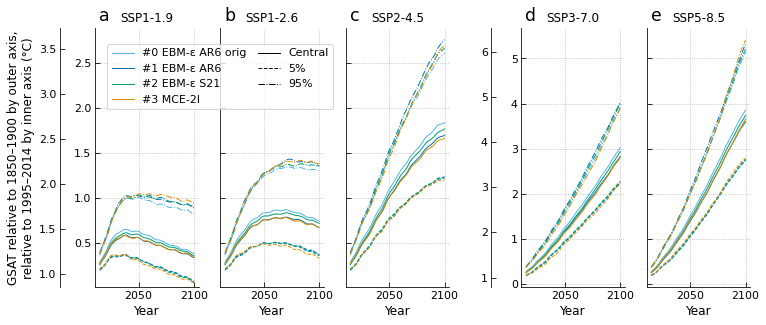

In [41]:
plt.init_general(
    height=3.6, aspect=0.4, wspace=0.3,
    extend=[
        ('right', -1, {}),
        ('right', -1, {}),
        ('right', -1, {'xoff': 1.}),
        ('right', -1, {}),
    ],
)

for n, scenario in enumerate(scenario_order):
    ax = plt(n)
    
    for q, ls in zip([0.5, 0.05, 0.95], ['-', '--', '-.']):
        df.loc[scenario, q].T[method_case_order].plot(
            ax=ax, color=map_color, ls=ls, legend=False,
        )

    ax.set_xlabel('Year')
    ax.set_title(map_scenario[scenario])
    ax.grid()

plt.figure.legend(
    handles, labels,
    loc='upper left',
    bbox_to_anchor=plt.get_fig_position_relto_axes((0.01, 0.96)),
    # labelspacing=0.1,
    ncol=2, columnspacing=1.,
)

for n in [1, 2, 4]:
    ax = plt(n)
    ax.yaxis.set_ticklabels([])

plt.axis_share(axis='y', axes=[0, 1, 2])
plt.axis_share(axis='y', axes=[3, 4])
plt.panel_label(xytext=(4, 3), ha='left')

for i, (ax, offset) in enumerate(zip(plt(0, 3), [35, 30])):
    ax2 = plt.make_twin(ax, 'left', offset=offset)
    ax2.set_ylim(*[y1 + gsat_1995to2014 for y1 in ax.get_ylim()])
    if i == 0:
        ax2.set_ylabel(
            'GSAT relative to 1850–1900 by outer axis,'
            '\nrelative to 1995–2014 by inner axis (°C)'
        )

plt.savefig('./image/timeseries_gsat_ssp.png')

## Range plot: mid- and long-term GSAT changes

In [42]:
df = pd.concat([
    pd.concat({
        k: v.droplevel([0, 1], axis=1).loc[:, slc].mean(axis=1)
        for k, v in df_gsat.groupby(axis=1, level=[0, 1])
    }).to_frame('{}-{}'.format(slc.start, slc.stop))
    for slc in [
        slice(2041, 2060),
        slice(2081, 2100),
    ]
], axis=1)
df

2041-2060  2081-2100
ar6 ssp119 0     0.750709   0.483796
           1     0.495868   0.350626
           2     0.485297   0.382750
           3     0.424621   0.332270
           4     0.472874   0.293269
...                   ...        ...
s21 ssp585 595   1.591469   3.491751
           596   1.377473   3.157146
           597   1.655557   3.876404
           598   1.717409   3.868605
           599   1.311336   3.040359

[12000 rows x 2 columns]

In [43]:
dfq = pd.concat([
    df_ch4.loc[:, year].rename('{}-{}'.format(year, year+19))
    for year in [2041, 2081]
], axis=1).add(gsat_1995to2014).rename(map_qpoint_2, level=2)

dfq = pd.concat([
    dfq,
    df
    .add(gsat_1995to2014)
    .groupby(level=[0, 1])
    .quantile(qpoints)
    .rename(map_qpoint, level=2)
]).unstack([1, 0]).sort_index(axis=1)
#.reorder_levels([1, 0, 2]).sort_index()
dfq

2041-2060                                    \
                              ssp119                                     
                   Constrained CMIP6 ECS-TCR mapped emulator       ar6   
central                     1.572384                1.556902  1.391899   
likely__lower                    NaN                1.422712  1.251237   
likely__upper                    NaN                1.747117  1.635438   
very_likely__lower          1.179229                1.326866  1.161277   
very_likely__upper          1.962858                1.874896  1.854818   

                                                                    \
                                                            ssp126   
                    ar6_orig    mce-2l       s21 Constrained CMIP6   
central             1.461300  1.390146  1.427330          1.699766   
likely__lower       1.275652  1.244389  1.252286               NaN   
likely__upper       1.675764  1.628307  1.657150               NaN   
very_likely__lower  1.157916  1.140265  1.161224          1.300697   
very_likely__upper  1.839299  1.869972  1.858820          2.198271   

                                                                ... 2081-2100  \
                                                                ...    ssp370   
                   ECS-TCR mapped emulator       ar6  ar6_orig  ...       ar6   
central                           1.765638  1.592933  1.668703  ...  3.341655   
likely__lower                     1.592188  1.444122  1.474721  ...  3.068377   
likely__upper                     1.993661  1.849214  1.907718  ...  3.932229   
very_likely__lower                1.474416  1.341063  1.336338  ...  2.849813   
very_likely__upper                2.139976  2.113773  2.077857  ...  4.418086   

                                                                    \
                                                            ssp585   
                    ar6_orig    mce-2l       s21 Constrained CMIP6   
central             3.524739  3.324198  3.432847          4.254108   
likely__lower       3.117541  3.030047  3.080517               NaN   
likely__upper       4.009526  3.824557  3.973800               NaN   
very_likely__lower  2.832199  2.811070  2.870566          3.222738   
very_likely__upper  4.291813  4.278914  4.371933          5.588753   

                                                                          \
                                                                           
                   ECS-TCR mapped emulator       ar6  ar6_orig    mce-2l   
central                           4.447145  4.063017  4.294595  4.079372   
likely__lower                     3.796629  3.622734  3.724304  3.636968   
likely__upper                     5.248738  4.813235  4.958037  4.802757   
very_likely__lower                3.361540  3.314918  3.299584  3.382122   
very_likely__upper                5.745917  5.558008  5.416469  5.602252   

                              
                              
                         s21  
central             4.178070  
likely__lower       3.652730  
likely__upper       4.879455  
very_likely__lower  3.316835  
very_likely__upper  5.469695  

[5 rows x 60 columns]

In [44]:
member_order = [
    'Constrained CMIP6',
    'ECS-TCR mapped emulator',
] + [
    map_method[k] for k in method_case_order
]

map_name_unit = {
    v: ('GSAT {} relative to 1995–2014'.format(v.replace('-', '–')), '°C')
    for v in dfq.columns.levels[0]
}

[2024-07-09 11:54:50 mce] INFO:saved to ./image/range_gsat_ssp.png


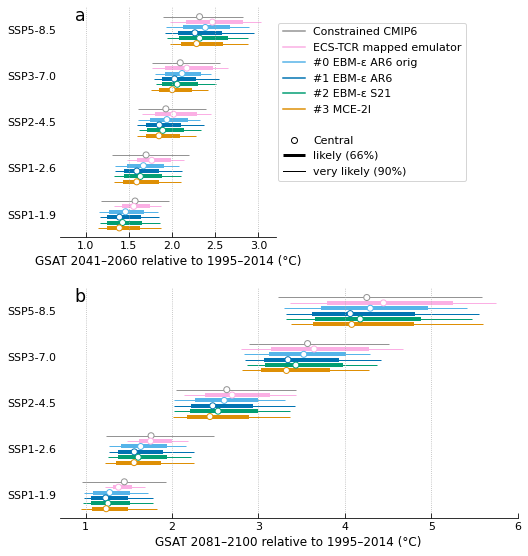

In [45]:
height = 3.2
aspect = 1.5*2./height

xlim0 = (0.7, 3.2)
xlim1 = (0.7, 6.0)
aspect1 = aspect * (xlim1[1] - xlim1[0]) / (xlim0[1] - xlim0[0])

plt.init_general(
    height=height, aspect=aspect,
    extend=[('bottom', -1, {'aspect': aspect1})],
)

plt.plot_quantile_range(
    dfq
    .rename(map_scenario, level=1, axis=1)
    .rename(map_method, level=2, axis=1),
    group_order=[map_scenario[k] for k in scenario_order[::-1]],
    member_order=member_order,
    map_color=map_color,
    map_name_unit=map_name_unit,
    axes=plt(),
    kw_legend={
        'loc': 'upper right',
        'bbox_to_anchor': (0.9, 0.98),
    }
)

plt(0).set_xlim(*xlim0)
plt(1).set_xlim(*xlim1)

plt.panel_label(va='top', xytext=(15, 0))

plt.savefig('./image/range_gsat_ssp.png')

## Range plot: forcing and response in 1995-2014

In [46]:
# Equilibrium response
df_eqres = pd.concat({
    k: v.droplevel(0, axis=1).div(df_parms['lamg'])
    for k, v in df_erf_1995to2014.groupby(level=0, axis=1)
}, axis=1)
df_eqres

erf                                 erf_co2                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    2.043599  1.806177  1.285835  1.353422  1.356810  1.188799  0.877603   
1    2.143558  1.328130  1.683355  1.359395  1.351223  0.888966  1.177129   
2    3.831277  1.908659  1.237661  1.577830  2.547036  1.414451  0.877708   
3    1.876309  1.231616  1.370159  1.636005  1.112203  0.857526  1.106849   
4    1.460065  1.878226  1.829019  1.495486  1.018722  1.123913  1.448462   
..        ...       ...       ...       ...       ...       ...       ...   
595  3.054677  1.557176  1.295494  1.605220  2.061137  1.002422  0.849853   
596  2.085014  1.662437  2.049154  1.496653  1.247145  1.260222  1.306329   
597  1.139506  1.541751  1.287708  2.089250  0.765983  1.102755  0.877306   
598  1.400406  1.262317  1.469619  2.591098  1.189225  0.874740  1.123913   
599  1.368891  1.599364  1.303032  1.615981  1.010165  0.966472  0.747270   

              erf_non-co2                                
          s21         ar6  ar6_orig    mce-2l       s21  
0    0.922691    0.686789  0.617379  0.408231  0.430730  
1    0.730393    0.792335  0.439164  0.506226  0.629001  
2    1.059016    1.284241  0.494208  0.359953  0.518814  
3    1.085167    0.764106  0.374089  0.263310  0.550838  
4    1.036933    0.441342  0.754313  0.380557  0.458553  
..        ...         ...       ...       ...       ...  
595  1.130992    0.993540  0.554754  0.445641  0.474228  
596  0.954380    0.837869  0.402215  0.742825  0.542274  
597  1.716863    0.373523  0.438996  0.410402  0.372387  
598  1.819167    0.211181  0.387577  0.345706  0.771931  
599  1.039957    0.358726  0.632892  0.555763  0.576024  

[600 rows x 12 columns]

In [47]:
# Realized warming fractions for typical conditions
aj = df_parms[['a0', 'a1']].rename(lambda x: x[-1], level=0, axis=1)
tauj = df_parms[['tau0', 'tau1']].rename(lambda x: x[-1], level=0, axis=1)
t70 = np.log(2.) / np.log(1.01)
df_rwf = pd.concat({
    'rwf_step_4':
    1. - (aj * np.exp(-4./tauj)).sum(level=1, axis=1),
    'rwf_ramp_70':
    1. - (aj * tauj * (1 - np.exp(-t70/tauj))).sum(level=1, axis=1) / t70,
}, axis=1)
df_rwf

rwf_step_4                               rwf_ramp_70                      \
           ar6  ar6_orig    mce-2l       s21         ar6  ar6_orig    mce-2l   
0     0.308105  0.380277  0.558179  0.467577    0.573186  0.580841  0.681816   
1     0.357561  0.485867  0.375772  0.445753    0.509242  0.783473  0.585867   
2     0.203288  0.327875  0.554465  0.397337    0.240382  0.514552  0.688768   
3     0.319412  0.491870  0.419590  0.437211    0.483582  0.689609  0.626160   
4     0.479288  0.347943  0.319784  0.403535    0.649151  0.499712  0.571573   
..         ...       ...       ...       ...         ...       ...       ...   
595   0.252951  0.411322  0.595566  0.384495    0.298228  0.656617  0.663471   
596   0.342021  0.418738  0.301872  0.479009    0.465564  0.580633  0.510208   
597   0.608107  0.466489  0.614347  0.273156    0.807788  0.639099  0.729363   
598   0.448843  0.528113  0.465645  0.238867    0.590683  0.767505  0.677030   
599   0.541556  0.404431  0.600280  0.405133    0.675879  0.609250  0.668216   

               
          s21  
0    0.695127  
1    0.630003  
2    0.598485  
3    0.664007  
4    0.714915  
..        ...  
595  0.605386  
596  0.723397  
597  0.449242  
598  0.404685  
599  0.590100  

[600 rows x 8 columns]

In [48]:
map_variable = {
    'erf': 'Total',
    'erf_co2': 'CO2',
    'erf_non-co2': 'Non-CO2',
    'rwf_ramp_70': 'Ramp 70 yrs',
    'rwf_step_4': 'Step 4 yrs',
}

In [49]:
dfq1 = (
    pd.concat({
        k: df.quantile(qpoints)
        for k, df in zip(
            ['ERF', 'ERF/lamg'],
            [df_erf_1995to2014, df_eqres],
        )
    }, axis=1)
    .rename(map_variable, level=1, axis=1)
    .rename(map_method, level=2, axis=1)
    .sort_index(axis=1)
    .rename(map_qpoint)
)
dfq1

ERF                                      \
                                 CO2                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          1.377135     1.223035     1.186610  1.010184   
likely__lower               1.456387     1.378985     1.356438  1.122524   
central                     1.564776     1.579549     1.576907  1.314605   
likely__upper               1.663689     1.812497     1.803588  1.566971   
very_likely__upper          1.737008     2.026983     2.015611  1.806325   

                                                                          \
                             Non-CO2                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          0.227630     0.268590     0.254712  0.238358   
likely__lower               0.376992     0.465686     0.417346  0.408464   
central                     0.593710     0.695025     0.686156  0.639848   
likely__upper               0.879281     0.942475     0.945580  0.858993   
very_likely__upper          1.100506     1.117599     1.114427  1.008623   

                                                   ...     ERF/lamg            \
                               Total               ...          CO2             
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6  ... #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          1.787275     1.747704  ...     0.730393  0.726607   
likely__lower               1.932979     1.945946  ...     0.893210  0.845238   
central                     2.175026     2.274000  ...     1.109896  1.011888   
likely__upper               2.422664     2.661307  ...     1.473165  1.286841   
very_likely__upper          2.640703     2.888179  ...     1.971005  1.642572   

                                                                          \
                             Non-CO2                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          0.209444     0.233639     0.205467  0.208000   
likely__lower               0.294889     0.344642     0.330853  0.323239   
central                     0.425478     0.503058     0.482271  0.490360   
likely__upper               0.569331     0.746263     0.629384  0.675393   
very_likely__upper          0.738749     0.953033     0.778387  0.791464   

                                                                          
                               Total                                      
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l  
very_likely__lower          1.170897     1.166585     1.200666  1.140808  
likely__lower               1.297406     1.324820     1.337037  1.293264  
central                     1.541829     1.645759     1.576921  1.522333  
likely__upper               1.850215     2.406961     1.988359  1.838882  
very_likely__upper          2.290091     3.114437     2.552272  2.188298  

[5 rows x 24 columns]

In [50]:
dfq2 = (
    df_rwf
    .quantile(qpoints)
    .rename(map_variable, level=0, axis=1)
    .rename(map_method, level=1, axis=1)
    .rename(map_qpoint)
    .sort_index(axis=1)
)
dfq2

Ramp 70 yrs                                      \
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          0.430679     0.300721     0.404657  0.491619   
likely__lower               0.516196     0.409712     0.507158  0.559267   
central                     0.636758     0.585598     0.603328  0.632988   
likely__upper               0.726740     0.713961     0.698290  0.694976   
very_likely__upper          0.783736     0.783277     0.752948  0.721370   

                          Step 4 yrs                                      
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l  
very_likely__lower          0.264269     0.203270     0.231466  0.281186  
likely__lower               0.336744     0.268227     0.309907  0.345137  
central                     0.413006     0.393052     0.405408  0.444994  
likely__upper               0.495394     0.483322     0.485914  0.552657  
very_likely__upper          0.546663     0.521848     0.526852  0.603314

In [51]:
d1 = df_erf_ch4.loc[:, 1995:2014].mean(axis=1).drop_duplicates().droplevel(1)
d1

erf            1.873524
erf_co2        1.555528
erf_non-co2    0.317996
dtype: float64

In [52]:
method = 'ECS-TCR mapped emulator'

dfq1_add = (
    pd.concat({
        ('ERF', method):
        pd.DataFrame(
            d1.values + np.zeros((len(df_parms_ch4), 1)),
            index=df_parms_ch4.index, columns=d1.index,
        ),
        ('ERF/lamg', method):
        pd.DataFrame(
            d1.values / df_parms_ch4['lamg'].values[:, None],
            index=df_parms_ch4.index, columns=d1.index,
        ),
    })
    .unstack([0, 1])
    .reorder_levels([1, 0, 2], axis=1)
    .rename(map_variable, level=1, axis=1)
    .rename(map_qpoint_2)
    .sort_index(axis=1)
)
dfq1_add

ERF                          \
                                       CO2                 Non-CO2   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                1.555528                0.317996   
likely__lower                     1.555528                0.317996   
central                           1.555528                0.317996   
likely__upper                     1.555528                0.317996   
very_likely__upper                1.555528                0.317996   

                                                          ERF/lamg  \
                                     Total                     CO2   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                1.873524                0.777764   
likely__lower                     1.873524                0.972205   
central                           1.873524                1.166646   
likely__upper                     1.873524                1.555528   
very_likely__upper                1.873524                1.944410   

                                                                    
                                   Non-CO2                   Total  
                   ECS-TCR mapped emulator ECS-TCR mapped emulator  
very_likely__lower                0.158998                0.936762  
likely__lower                     0.198747                1.170952  
central                           0.238497                1.405143  
likely__upper                     0.317996                1.873524  
very_likely__upper                0.397495                2.341905

In [53]:
dfq2_add = (
    pd.concat({method: df_parms_ch4[['rwf_step_4', 'rwf_ramp_70']].stack()})
    .unstack([2, 0])
    .rename(map_variable, level=0, axis=1)
    .sort_index(axis=1)
    .rename(map_qpoint_2)
)
dfq2_add

,Ramp 70 yrs,Step 4 yrs
,ECS-TCR mapped emulator,ECS-TCR mapped emulator
very_likely__lower,0.637590,0.519584
likely__lower,0.593872,0.459427
central,0.609743,0.440954
likely__upper,0.553787,0.364197
very_likely__upper,0.486816,0.302531


In [54]:
member_order = [method] + [
    map_method[k]
    for k in method_case_order
]

In [76]:
[tx._text.replace('CO2', 'CO$_2$') for tx in ax.get_yticklabels()]

['CO$_2$', 'Non-CO$_2$', 'Total']

[2024-07-09 13:24:40 mce] INFO:saved to ./image/range_forcing_1995-2014.png


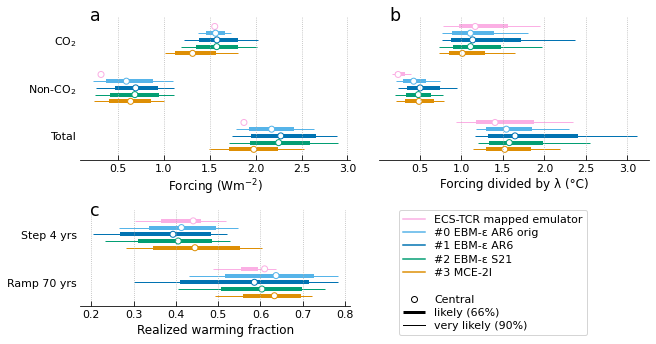

In [78]:
height_ref = 1.5
width = height_ref * 2.5
height = 2.0

plt.init_general(
    height=height,
    aspect=width/height,
    wspace=0.4,
    extend=[
        ('right', -1, {}),
        ('bottom', 0,
         {'height': height*(2./3.), 'aspect': width/height*(3./2.)}),
    ],
)

map_name_unit = {
    'ERF': ('Forcing', 'Wm$^{−2}$'),
    'ERF/lamg': ('Forcing divided by λ', '°C'),
    'RWF': ('Realized warming fraction', ''),
}

plt.plot_quantile_range(
    pd.concat([dfq1, dfq1_add], axis=1).sort_index(axis=1),
    axes=plt(0, 1),
    member_order=member_order,
    map_color=map_color,
    map_name_unit=map_name_unit,
    kw_legend={
        'loc': 'upper left', 'bbox_to_anchor': (0.55, 0.35),
        'labelspacing': 0.3,
    },
)
plt(0).set_yticklabels([
    tx._text.replace('CO2', 'CO$_2$') for tx in plt(0).get_yticklabels()
])
plt(1).tick_params(axis='y', labelleft=False)

plt.plot_quantile_range(
    pd.concat({
        'RWF': pd.concat([dfq2, dfq2_add], axis=1).sort_index(axis=1)
    }, axis=1),
    axes=[plt(2)],
    group_order=['Step 4 yrs', 'Ramp 70 yrs'],
    member_order=member_order,
    map_color=map_color,
    map_name_unit=map_name_unit,
)
plt.figure.legends[1].remove()
plt.panel_label(va='center', xytext=(10, 0))

plt.savefig('./image/range_forcing_1995-2014.png')

## Range plot: forcing and response in 2081-2100

In [79]:
df_erf_2081to2100

erf                                                               \
          ar6                                           ar6_orig             
       ssp119    ssp126    ssp245    ssp370     ssp585    ssp119    ssp126   
0    1.879150  2.488463  4.259208  6.216424   7.466410  2.429909  3.228474   
1    2.663185  3.475398  5.856766  8.509301  10.164596  2.461713  3.229583   
2    2.977368  3.893081  6.466424  9.394137  11.262909  2.444766  3.191215   
3    2.096292  2.739568  4.695417  6.798356   8.090057  2.341108  3.058421   
4    2.782341  3.595531  6.033705  8.355730  10.377146  2.053126  2.718668   
..        ...       ...       ...       ...        ...       ...       ...   
595  2.740820  3.642254  6.162655  9.130950  10.802535  2.411559  3.133353   
596  2.370984  3.144004  5.377073  8.027313   9.389809  2.573242  3.382130   
597  2.458207  3.191012  5.321534  7.429698   9.176161  2.562127  3.395014   
598  3.324893  4.336197  7.083550  9.823900  12.221413  2.596853  3.421767   
599  2.557121  3.330734  5.678814  7.736814   9.734283  2.225064  2.853522   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    5.474129  8.256036  9.713990  ...    0.515356  0.570855  1.161972   
1    5.410277  7.821477  9.457637  ...    0.479030  0.553516  1.095289   
2    5.337904  7.529311  9.299602  ...    0.390067  0.467371  1.125296   
3    5.044352  7.135674  8.826342  ...    0.301952  0.382326  0.993475   
4    4.642333  6.986240  8.179722  ...    0.559193  0.615431  1.132195   
..        ...       ...       ...  ...         ...       ...       ...   
595  5.284702  7.521703  9.070439  ...    0.378432  0.434923  1.023262   
596  5.683441  7.821780  9.854711  ...    0.313946  0.391265  0.975273   
597  5.678029  8.081591  9.917204  ...    0.477574  0.546678  1.277886   
598  5.667607  8.117397  9.809788  ...    0.422216  0.511273  1.218427   
599  4.776153  6.801794  8.293340  ...    0.365232  0.434985  1.077645   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    1.488202  1.829816  0.287444  0.347457  0.861958  1.518335  1.480620  
1    1.720096  1.882609  0.494022  0.535420  1.116961  1.959965  1.798768  
2    1.414353  1.732540  0.415413  0.487431  1.098720  1.818155  1.787356  
3    1.219186  1.648198  0.463835  0.541523  1.225480  1.819021  1.961591  
4    1.303757  1.796866  0.470102  0.542962  0.965271  1.494993  1.642749  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.671977  1.760838  0.541744  0.606549  1.198953  1.861196  1.987281  
596  1.568829  1.581898  0.344545  0.443115  1.206693  2.107309  1.929680  
597  2.013960  2.089697  0.312443  0.393929  0.978890  1.290960  1.607656  
598  1.669576  1.921268  0.487149  0.537583  1.053127  1.554183  1.743037  
599  1.649441  1.798238  0.421146  0.481490  1.053735  1.684615  1.727970  

[600 rows x 60 columns]

In [80]:
# Equilibrium response
df_eqres = pd.concat({
    k: v.droplevel([0, 2], axis=1).div(df_parms['lamg'])
    for k, v in df_erf_2081to2100.groupby(level=[0, 2], axis=1)
}, axis=1).reorder_levels([0, 2, 1], axis=1).sort_index(axis=1)
df_eqres

erf                                                                \
          ar6                                            ar6_orig             
       ssp119    ssp126    ssp245     ssp370     ssp585    ssp119    ssp126   
0    2.075692  2.748734  4.704683   6.866606   8.247329  1.776417  2.360219   
1    2.095457  2.734526  4.608243   6.695320   7.997746  1.379865  1.810280   
2    3.966364  5.186250  8.614382  12.514597  15.004122  2.224926  2.904253   
3    1.761958  2.302639  3.946552   5.714097   6.799787  1.343671  1.755370   
4    1.603247  2.071824  3.476754   4.814757   5.979541  1.697587  2.247878   
..        ...       ...       ...        ...        ...       ...       ...   
595  3.032550  4.029932  6.818602  10.102839  11.952347  1.641613  2.132957   
596  1.876515  2.488322  4.255686   6.353218   7.431566  1.929151  2.535571   
597  1.224635  1.589705  2.651092   3.701342   4.571398  1.653978  2.191647   
598  1.838160  2.397257  3.916125   5.431122   6.756582  1.360916  1.793224   
599  1.586109  2.065959  3.522405   4.798923   6.037896  1.624495  2.083325   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    4.001934  6.035683  7.101539  ...    0.314105  0.347931  0.708213   
1    3.032626  4.384177  5.301294  ...    0.487448  0.563243  1.114537   
2    4.857906  6.852256  8.463358  ...    0.242589  0.290666  0.699841   
3    2.895188  4.095495  5.065848  ...    0.252796  0.320085  0.831742   
4    3.838424  5.776438  6.763245  ...    0.542090  0.596608  1.097566   
..        ...       ...       ...  ...         ...       ...       ...   
595  3.597438  5.120224  6.174489  ...    0.229380  0.263621  0.620234   
596  4.260855  5.863961  7.388042  ...    0.425709  0.530555  1.322467   
597  3.665444  5.217061  6.402038  ...    0.217199  0.248627  0.581178   
598  2.970187  4.254033  5.140954  ...    0.316253  0.382960  0.912642   
599  3.487018  4.965916  6.054877  ...    0.262477  0.312605  0.774457   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    0.907047  1.115258  0.183287  0.221554  0.549624  0.968160  0.944110  
1    1.750324  1.915692  0.265637  0.287897  0.600593  1.053878  0.967202  
2    0.879611  1.077497  0.288074  0.338015  0.761922  1.260825  1.239467  
3    1.020708  1.379879  0.276743  0.323095  0.731172  1.085304  1.170367  
4    1.263882  1.741909  0.354538  0.409486  0.727980  1.127482  1.238916  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.013442  1.067303  0.389827  0.436459  0.862740  1.339275  1.430003  
596  2.127327  2.145049  0.177518  0.228304  0.621717  1.085736  0.994217  
597  0.915942  0.950387  0.298792  0.376717  0.936121  1.234556  1.537415  
598  1.250568  1.439093  0.641002  0.707365  1.385731  2.045033  2.293532  
599  1.185382  1.292316  0.289625  0.331125  0.724662  1.158524  1.188339  

[600 rows x 60 columns]

In [120]:
dfq1 = (
    pd.concat({
        'ERF': df_erf_2081to2100,
        'ERF/lamg': df_eqres,
    }, axis=1)
    .quantile(qpoints)
    .rename(map_qpoint)
    .rename(map_variable, level=1, axis=1)
    .rename(map_method, level=2, axis=1)
    .rename(map_scenario, level=3, axis=1)
    .reorder_levels([0, 1, 3, 2], axis=1)
    .sort_index(axis=1)
)
dfq1

ERF                                      \
                                 CO2                                       
                            SSP1-1.9                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          1.717076     1.524937     1.479521  1.255424   
likely__lower               1.815891     1.719383     1.691270  1.395178   
central                     1.951036     1.969455     1.966161  1.633486   
likely__upper               2.074365     2.259906     2.248798  1.947689   
very_likely__upper          2.165783     2.527337     2.513158  2.244728   

                                                                          \
                                                                           
                            SSP1-2.6                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          2.327155     2.066748     2.005195  1.690593   
likely__lower               2.461078     2.330280     2.292179  1.878336   
central                     2.644240     2.669203     2.664739  2.198992   
likely__upper               2.811388     3.062852     3.047797  2.622846   
very_likely__upper          2.935286     3.425301     3.406084  3.022500   

                                                   ...     ERF/lamg            \
                                                   ...        Total             
                            SSP2-4.5               ...     SSP2-4.5             
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6  ... #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          3.722961     3.306364  ...     2.600544  2.671251   
likely__lower               3.937210     3.727961  ...     3.022822  2.975516   
central                     4.230231     4.270167  ...     3.769093  3.509494   
likely__upper               4.497632     4.899922  ...     5.038181  4.482071   
very_likely__upper          4.695844     5.479765  ...     6.754399  5.878746   

                                                                          \
                                                                           
                            SSP3-7.0                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          3.910615     3.845711     3.764487  3.781762   
likely__lower               4.382922     4.342030     4.373644  4.208264   
central                     5.390798     5.551549     5.299830  4.960302   
likely__upper               6.626827     8.319369     7.093876  6.274227   
very_likely__upper          8.433236    11.248201     9.272378  8.067638   

                                                                           
                                                                           
                            SSP5-8.5                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21  #3 MCE-2l  
very_likely__lower          4.658205     4.612219     4.470921   4.634421  
likely__lower               5.324103     5.273639     5.271259   5.136303  
central                     6.557730     6.803508     6.530849   6.153366  
likely__upper               8.194570    10.179687     8.804523   7.917320  
very_likely__upper         10.556405    14.003729    11.741404  10.703013  

[5 rows x 120 columns]

In [121]:
d1 = df_erf_ch4.loc[:, 2081:2100].mean(axis=1)
d1

erf          ssp119    2.392135
             ssp126    3.153487
             ssp245    5.225013
             ssp370    7.401665
             ssp585    9.126088
erf_co2      ssp119    1.939505
             ssp126    2.628612
             ssp245    4.205229
             ssp370    5.929550
             ssp585    7.433428
erf_non-co2  ssp119    0.452630
             ssp126    0.524875
             ssp245    1.019784
             ssp370    1.472115
             ssp585    1.692660
dtype: float64

In [122]:
dfq2 = (
    pd.concat({
        ('ERF', method):
        pd.DataFrame(
            d1.values + np.zeros((len(df_parms_ch4), 1)),
            index=df_parms_ch4.index, columns=d1.index,
        ),
        ('ERF/lamg', method):
        pd.DataFrame(
            d1.values / df_parms_ch4['lamg'].values[:, None],
            index=df_parms_ch4.index, columns=d1.index,
        ),
    }, axis=1)
    .rename(map_qpoint_2)
    .rename(map_variable, level=2, axis=1)
    .rename(map_scenario, level=3, axis=1)
    .reorder_levels([0, 2, 3, 1], axis=1)
    .sort_index(axis=1)
)
dfq2

ERF                          \
                                       CO2                           
                                  SSP1-1.9                SSP1-2.6   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                1.939505                2.628612   
likely__lower                     1.939505                2.628612   
central                           1.939505                2.628612   
likely__upper                     1.939505                2.628612   
very_likely__upper                1.939505                2.628612   

                                                                    \
                                                                     
                                  SSP2-4.5                SSP3-7.0   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                4.205229                 5.92955   
likely__lower                     4.205229                 5.92955   
central                           4.205229                 5.92955   
likely__upper                     4.205229                 5.92955   
very_likely__upper                4.205229                 5.92955   

                                                                    \
                                                           Non-CO2   
                                  SSP5-8.5                SSP1-1.9   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                7.433428                 0.45263   
likely__lower                     7.433428                 0.45263   
central                           7.433428                 0.45263   
likely__upper                     7.433428                 0.45263   
very_likely__upper                7.433428                 0.45263   

                                                                    \
                                                                     
                                  SSP1-2.6                SSP2-4.5   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.524875                1.019784   
likely__lower                     0.524875                1.019784   
central                           0.524875                1.019784   
likely__upper                     0.524875                1.019784   
very_likely__upper                0.524875                1.019784   

                                                                    ...  \
                                                                    ...   
                                  SSP3-7.0                SSP5-8.5  ...   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator  ...   
very_likely__lower                1.472115                 1.69266  ...   
likely__lower                     1.472115                 1.69266  ...   
central                           1.472115                 1.69266  ...   
likely__upper                     1.472115                 1.69266  ...   
very_likely__upper                1.472115                 1.69266  ...   

                                  ERF/lamg                          \
                                   Non-CO2                           
                                  SSP1-1.9                SSP1-2.6   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.226315                0.262438   
likely__lower                     0.282894                0.328047   
central                           0.339473                0.393656   
likely__upper                     0.452630                0.524875   
very_likely__upper                0.565788                0.656094   

                                                                    \
                                                                     
                                  SSP2-4.5                SSP3-7.0  

In [123]:
dfq = pd.concat([dfq1, dfq2], axis=1)
dfq

ERF                                      \
                                 CO2                                       
                            SSP1-1.9                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          1.717076     1.524937     1.479521  1.255424   
likely__lower               1.815891     1.719383     1.691270  1.395178   
central                     1.951036     1.969455     1.966161  1.633486   
likely__upper               2.074365     2.259906     2.248798  1.947689   
very_likely__upper          2.165783     2.527337     2.513158  2.244728   

                                                                          \
                                                                           
                            SSP1-2.6                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          2.327155     2.066748     2.005195  1.690593   
likely__lower               2.461078     2.330280     2.292179  1.878336   
central                     2.644240     2.669203     2.664739  2.198992   
likely__upper               2.811388     3.062852     3.047797  2.622846   
very_likely__upper          2.935286     3.425301     3.406084  3.022500   

                                                   ...  \
                                                   ...   
                            SSP2-4.5               ...   
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6  ...   
very_likely__lower          3.722961     3.306364  ...   
likely__lower               3.937210     3.727961  ...   
central                     4.230231     4.270167  ...   
likely__upper               4.497632     4.899922  ...   
very_likely__upper          4.695844     5.479765  ...   

                                  ERF/lamg                          \
                                   Non-CO2                           
                                  SSP1-1.9                SSP1-2.6   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.226315                0.262438   
likely__lower                     0.282894                0.328047   
central                           0.339473                0.393656   
likely__upper                     0.452630                0.524875   
very_likely__upper                0.565788                0.656094   

                                                                    \
                                                                     
                                  SSP2-4.5                SSP3-7.0   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.509892                0.736057   
likely__lower                     0.637365                0.920072   
central                           0.764838                1.104086   
likely__upper                     1.019784                1.472115   
very_likely__upper                1.274730                1.840144   

                                                                    \
                                                             Total   
                                  SSP5-8.5                SSP1-1.9   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.846330                1.196068   
likely__lower                     1.057913                1.495084   
central                           1.269495                1.794101   
likely__upper                     1.692660                2.392135   
very_likely__upper                2.115825                2.990169   

                                                                    \
                                                                     
                                  SSP1-2.6                SSP2-4.5   
                   ECS-TCR mapped emu

In [125]:
dfq.columns = pd.MultiIndex.from_tuples([
    (f'{x[0]}|{x[1]}', x[2], x[3]) for x in dfq.columns
])

In [126]:
dfq

ERF|CO2                                      \
                            SSP1-1.9                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          1.717076     1.524937     1.479521  1.255424   
likely__lower               1.815891     1.719383     1.691270  1.395178   
central                     1.951036     1.969455     1.966161  1.633486   
likely__upper               2.074365     2.259906     2.248798  1.947689   
very_likely__upper          2.165783     2.527337     2.513158  2.244728   

                                                                          \
                            SSP1-2.6                                       
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6 #2 EBM-ε S21 #3 MCE-2l   
very_likely__lower          2.327155     2.066748     2.005195  1.690593   
likely__lower               2.461078     2.330280     2.292179  1.878336   
central                     2.644240     2.669203     2.664739  2.198992   
likely__upper               2.811388     3.062852     3.047797  2.622846   
very_likely__upper          2.935286     3.425301     3.406084  3.022500   

                                                   ...  \
                            SSP2-4.5               ...   
                   #0 EBM-ε AR6 orig #1 EBM-ε AR6  ...   
very_likely__lower          3.722961     3.306364  ...   
likely__lower               3.937210     3.727961  ...   
central                     4.230231     4.270167  ...   
likely__upper               4.497632     4.899922  ...   
very_likely__upper          4.695844     5.479765  ...   

                          ERF/lamg|Non-CO2                          \
                                  SSP1-1.9                SSP1-2.6   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.226315                0.262438   
likely__lower                     0.282894                0.328047   
central                           0.339473                0.393656   
likely__upper                     0.452630                0.524875   
very_likely__upper                0.565788                0.656094   

                                                                    \
                                  SSP2-4.5                SSP3-7.0   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.509892                0.736057   
likely__lower                     0.637365                0.920072   
central                           0.764838                1.104086   
likely__upper                     1.019784                1.472115   
very_likely__upper                1.274730                1.840144   

                                                    ERF/lamg|Total  \
                                  SSP5-8.5                SSP1-1.9   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                0.846330                1.196068   
likely__lower                     1.057913                1.495084   
central                           1.269495                1.794101   
likely__upper                     1.692660                2.392135   
very_likely__upper                2.115825                2.990169   

                                                                    \
                                  SSP1-2.6                SSP2-4.5   
                   ECS-TCR mapped emulator ECS-TCR mapped emulator   
very_likely__lower                1.576744                2.612507   
likely__lower                     1.970929                3.265633   
central                           2.365115                3.918760   
likely__upper                     3.153487                5.225013   
very_likely__upper                3.941859                6.531266   

                                                                    
                                 

[2024-07-09 14:38:24 mce] INFO:saved to ./image/range_forcing_ssp_2081-2100.png


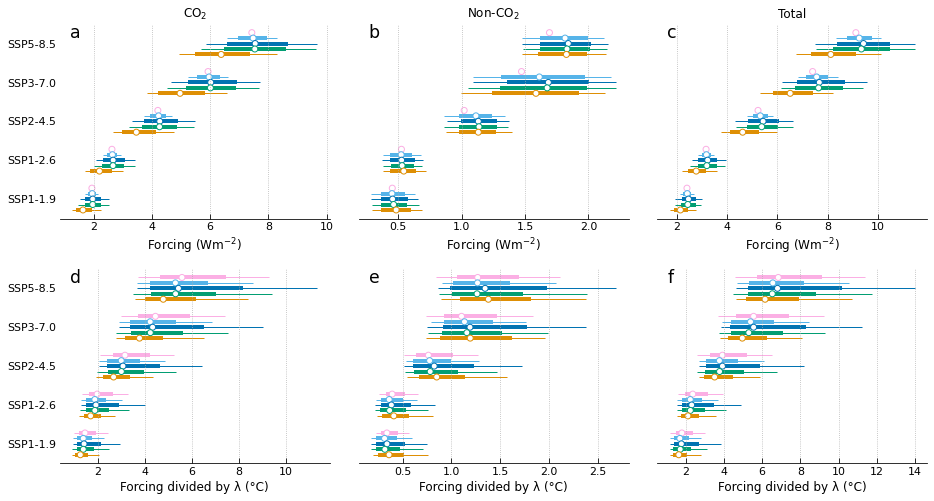

In [134]:
height = 2.7
width = height_ref * 2.5
kw_space = {'height': height, 'aspect': width/height, 'wspace': 0.4}
plt.init_regular(6, col=3, kw_space=kw_space)

parm_order = [
    'ERF|CO2',
    'ERF|Non-CO2',
    'ERF|Total',
    'ERF/lamg|CO2',
    'ERF/lamg|Non-CO2',
    'ERF/lamg|Total',
]

plt.plot_quantile_range(
    dfq,
    axes=plt(),
    parm_order=parm_order,
    member_order=member_order,
    group_order=[map_scenario[k] for k in scenario_order[::-1]],
    map_color=map_color,
    # col=3,
    # kw_space=kw_space,
    map_name_unit=map_name_unit,
)

plt.figure.legends[0].remove()

for i, ax in enumerate(plt()):
    ax.set_xlabel(
        '{} ({})'.format(*map_name_unit[ax.get_xlabel().split('|')[0]])
    )
    if i % 3 != 0:
        ax.tick_params(axis='y', labelleft=False)

    if i < 3:
        ax.set_title(parm_order[i].split('|')[1].replace('CO2', 'CO$_2$'))

plt.panel_label(va='top', xytext=(10, 0))
plt.savefig('./image/range_forcing_ssp_2081-2100.png')